## The problem

- We have to choose between 3 doors to open.
- One of them has a car, the other 2 a goat
- We first choose one of the 3, but they don't open it.
- They open one of the 2 remaining doors to show there is a goat.
- We now have to choose one of the 2

## Which of the two doors should we choose?
- Stay with our first selection
- Change to the other door

## The Math
What are the odds? Should I stay with the first selection? Should I change? Is it option better than the other one?

W = "Winning the car"

### I will stay with my first choice

$P(W) = 1/3$

I will win if I hit the correct door in my first attempt. So I have 1 over 3 possible doors

### I will throw a coin and choose randomly between the 2 remaining doors

$P(W) = 1/2$

Thats good! I have increased my odds to 1 over the 2 possible doors


### I will change my choice

Lets say I have chosen door 1 and they opened door 2 to show there is a goat. 

$C_1$ = "Car behind door 1"

$C_3$ = "Car behind door 3"

$G_2$ = "Goat behind door 2"

The probability of a car in door 1 is 1/3

$P(C_1) = 1/3$ 

I want to know which is the probability that there is a car behing door 1 given that there is a goat behing door 2. Or which is the probability that there is a car behing door 3 given that there is a goat behing door 2

$P(C_1|G_2)$ = ? 

$P(C_3|G_2)$ = ? 

$P(C_1|G_2) + P(C_3|G_2) = 1$

By bayes rule:

$P(C_1|G_2) = \frac{P(G_2/C_1)P(C_1)}{P(G_2)}$

$P(C_1|G_2) = \frac{P(G_2/C_1)P(C_1)}{P(G_2|C_1)P(C_1) + P(G_2|not C_1)P(not C_1)}$

$P(C_1|G_2) = \frac{(1/2)(1/3)}{(1)(1/3)+(1/2)(1/3)} = 1/3$

$P(notC_1|G_2) = P(C_3|G_2) = 2/3$ 

So you better choose door 3!!! ;)

## You don't trust the math? Lets simulate it!

   win_perc         switch_door
0     66.29  Always switch door
1     33.27   Never switch door


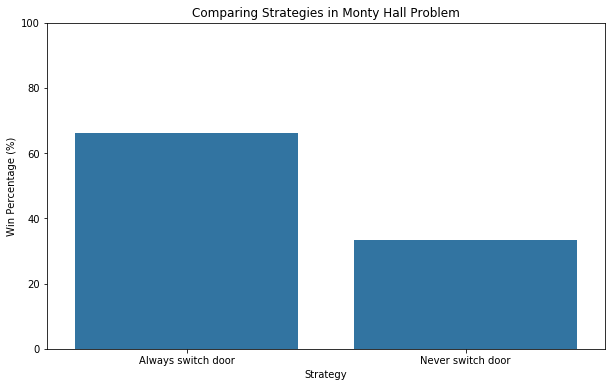

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_monty_hall(n, switch_door):
    ''' 
    returns win count and relative frequency of Monty Hall game for different strategies, 
    where
    n - number of games played
    switch_door - strategy indicator, if true always switch_door, if false never switch_door
    '''
        
    # initialise win count
    win = 0
    
    # possible prizes
    prizes = ['Car', 'Goat1', 'Goat2']
    bad_prizes = prizes[1:3]#nao pega 0
    
    # iterate over number of games
    for j in range(n):
        # allocation of prizes to doors
        doors = np.random.choice(prizes, size=3, replace=False) #coloco carro ou cabra
        #print(doors)
        
        # player's first choice
        first_choice = np.random.randint(1,3) #ESCOLHA INICIAL

        #print(first_choice)
        
        # strategy 1: always switch door 
        if switch_door:
            #no arrray de portas a posicao escolhida inicialmente continha um car?
            if doors[first_choice] == 'Car':
                reveal = np.random.choice(bad_prizes, size=1)
                reveal_pos = np.where(doors == reveal)
            elif doors[first_choice] == 'Goat1':
                reveal_pos = np.where(doors == 'Goat2')
            elif doors[first_choice] == 'Goat2':
                reveal_pos = np.where(doors == 'Goat1')
            # player's last choice, here switching to remaining door
            final_choice = np.delete(doors, [first_choice, int(reveal_pos[0])])

        # strategy 2: never switch door
        elif not switch_door:
            # player's last choice, here staying with first choice
            final_choice = doors[first_choice]

        # determine whether player has won based on final choice
        if final_choice == 'Car':
            win += 1
        
    # return win count and frequency        
    return win, win/n



n = 10000
np.random.seed(123)
sw_cnts, sw_freq = simulate_monty_hall(n, switch_door=True)
nosw_cnts, nosw_freq = simulate_monty_hall(n, switch_door=False)


results = pd.DataFrame({'win_perc': [sw_freq*100, nosw_freq*100],
                        #'loss_freq': [1-sw_freq, 1-nosw_freq],
                        'switch_door': ['True', 'False']})
results['switch_door'] = results['switch_door'].map({'True': 'Always switch door', 
                                                     'False': 'Never switch door'})
print(results)



fig = plt.figure(1, figsize=(10,6))
ax = sns.barplot(data=results.melt(id_vars=['switch_door']), 
                 y='value', x='switch_door', hue='variable')
ax.legend_.remove()
ax.set(ylim=(0, 100), 
       ylabel=('Win Percentage (%)'), 
       xlabel=('Strategy'),
       title=('Comparing Strategies in Monty Hall Problem'))
plt.show()

